<a href="https://colab.research.google.com/github/Instyrah/CNN/blob/main/Bekerja_Dengan_Dataset_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Contoh Program Lengkap Bekerja dengan Dataset Iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# 1. Memuat Dataset Iris dan Konversi ke DataFrame
iris = load_iris()
# Konversi data ke DataFrame dengan nama kolom yang sesuai
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Menambahkan kolom target dan nama spesies untuk referensi
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

print("5 Baris Pertama Dataset Iris:")
print(df.head())



5 Baris Pertama Dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [ ]:
# 2. Eksplorasi Data
print("\nInformasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())




Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%         

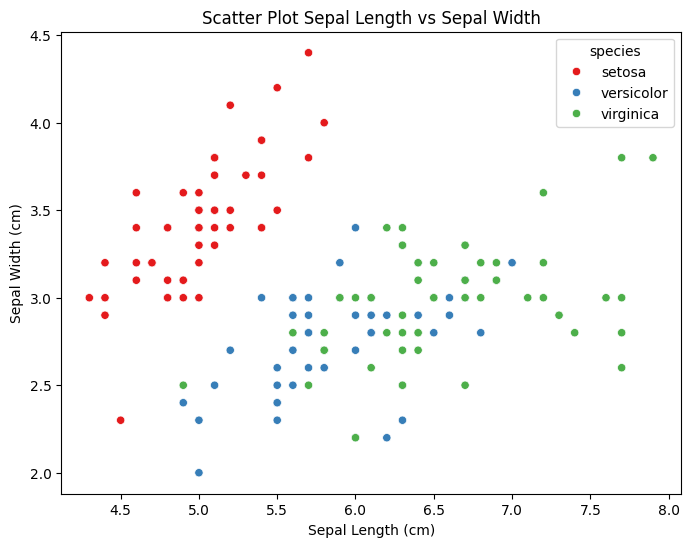

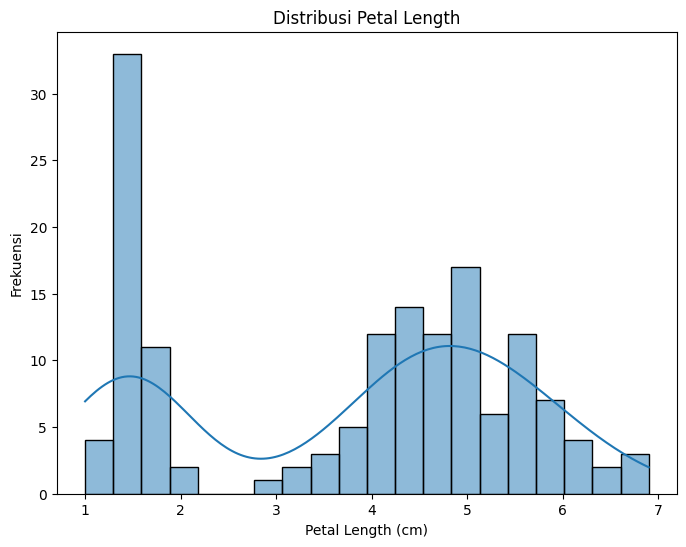

In [ ]:
# 3. Visualisasi Data

# 3.1 Scatter Plot: Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)',
                hue='species', palette='Set1')
plt.title("Scatter Plot Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

# 3.2 Histogram: Distribusi Petal Length
plt.figure(figsize=(8, 6))
sns.histplot(df['petal length (cm)'], bins=20, kde=True)
plt.title("Distribusi Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frekuensi")
plt.show()



In [ ]:
# 4. Membagi Data menjadi Training dan Testing
# Memisahkan fitur dan label
X = df[iris.feature_names]
y = df['target']

# Pembagian data dengan rasio 70:30 (training:testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nJumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])




Jumlah Data Training: 105
Jumlah Data Testing: 45


In [ ]:
# 5. Melatih Model dengan Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)


Akurasi Model: 100.00%


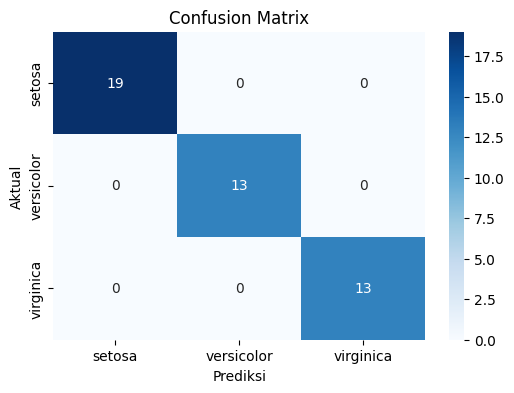

In [ ]:
# 6. Memprediksi dan Mengevaluasi Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model: {:.2f}%".format(accuracy * 100))

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()
